<a href="https://colab.research.google.com/github/shruti63-code/shruti63-code/blob/main/insights.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
!pip install pulp
from pulp import LpMaximize, LpProblem, LpVariable
import matplotlib.pyplot as plt
import numpy as np

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.7/17.7 MB 50.1 MB/s eta 0:00:00


In [3]:
# Problem Description
problem_description = """
A factory produces two types of products: A and B.
- Each unit of product A gives a profit of $20, and each unit of product B gives a profit of $30.
- Producing one unit of product A requires 3 hours of labor and 1 unit of raw material.
- Producing one unit of product B requires 2 hours of labor and 2 units of raw material.
- The factory has a maximum of 12 hours of labor and 8 units of raw material available.
Goal: Maximize profit while satisfying resource constraints.
"""
print(problem_description)


A factory produces two types of products: A and B.
- Each unit of product A gives a profit of $20, and each unit of product B gives a profit of $30.
- Producing one unit of product A requires 3 hours of labor and 1 unit of raw material.
- Producing one unit of product B requires 2 hours of labor and 2 units of raw material.
- The factory has a maximum of 12 hours of labor and 8 units of raw material available.
Goal: Maximize profit while satisfying resource constraints.



In [4]:
# Linear Programming Setup
problem = LpProblem("Maximize_Factory_Profit", LpMaximize)

x = LpVariable("Product_A", lowBound=0)
y = LpVariable("Product_B", lowBound=0)

problem += 20 * x + 30 * y
problem += 3 * x + 2 * y <= 12
problem += x + 2 * y <= 8

problem.solve()

1

In [5]:

# Displaying Optimal Solution
optimal_solution = {
    "Product_A": x.varValue,
    "Product_B": y.varValue,
    "Maximum_Profit": problem.objective.value()
}
optimal_solution_df = pd.DataFrame([optimal_solution])
print("Optimal Solution:")
print(optimal_solution_df)

Optimal Solution:
   Product_A  Product_B  Maximum_Profit
0        2.0        3.0           130.0


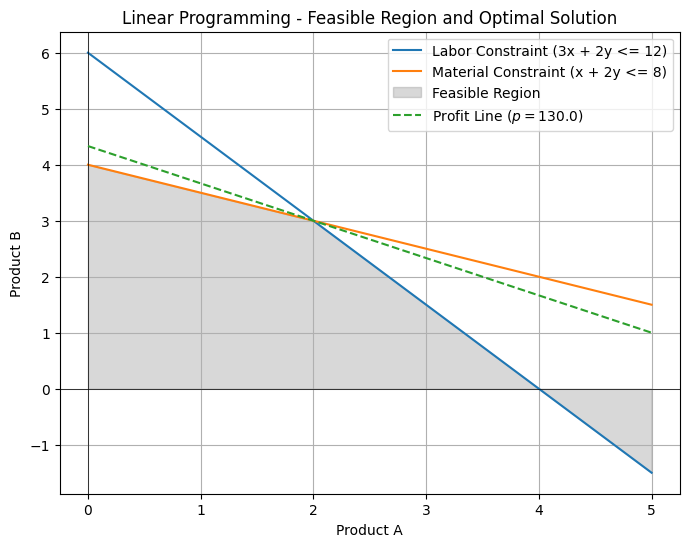

In [6]:
# Insights and Visualization
labor_x = np.linspace(0, 5, 100)
labor_y = (12 - 3 * labor_x) / 2
material_y = (8 - labor_x) / 2
profit_line = lambda x, p: (p - 20 * x) / 30

plt.figure(figsize=(8, 6))
plt.plot(labor_x, labor_y, label="Labor Constraint (3x + 2y <= 12)")
plt.plot(labor_x, material_y, label="Material Constraint (x + 2y <= 8)")
plt.fill_between(labor_x, np.minimum(labor_y, material_y), 0, color="gray", alpha=0.3, label="Feasible Region")
plt.axhline(0, color="black", linewidth=0.5)
plt.axvline(0, color="black", linewidth=0.5)

p = problem.objective.value()
plt.plot(labor_x, profit_line(labor_x, p), label=f"Profit Line ($p = {p}$)", linestyle="--")

plt.xlabel("Product A")
plt.ylabel("Product B")
plt.title("Linear Programming - Feasible Region and Optimal Solution")
plt.legend()
plt.grid()
plt.show()



In [7]:
# Final Report
print("Summary Report:")
print(f"Optimal production of Product A: {optimal_solution['Product_A']} units")
print(f"Optimal production of Product B: {optimal_solution['Product_B']} units")
print(f"Maximum Profit: ${optimal_solution['Maximum_Profit']}")


Summary Report:
Optimal production of Product A: 2.0 units
Optimal production of Product B: 3.0 units
Maximum Profit: $130.0
